In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cansuzm","key":"2af7fc1223fe70fdac22bc3d1f2c5c50"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d cansuzm/BreastUltrasoundImages

Dataset URL: https://www.kaggle.com/datasets/cansuzm/BreastUltrasoundImages
License(s): unknown
 97% 189M/195M [00:01<00:00, 139MB/s]
100% 195M/195M [00:01<00:00, 133MB/s]


In [ ]:
import zipfile
import os

with zipfile.ZipFile('BreastUltrasoundImages.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.math import confusion_matrix
import seaborn as sns
tf.random.set_seed(3)
from tensorflow.keras.applications import ResNet50

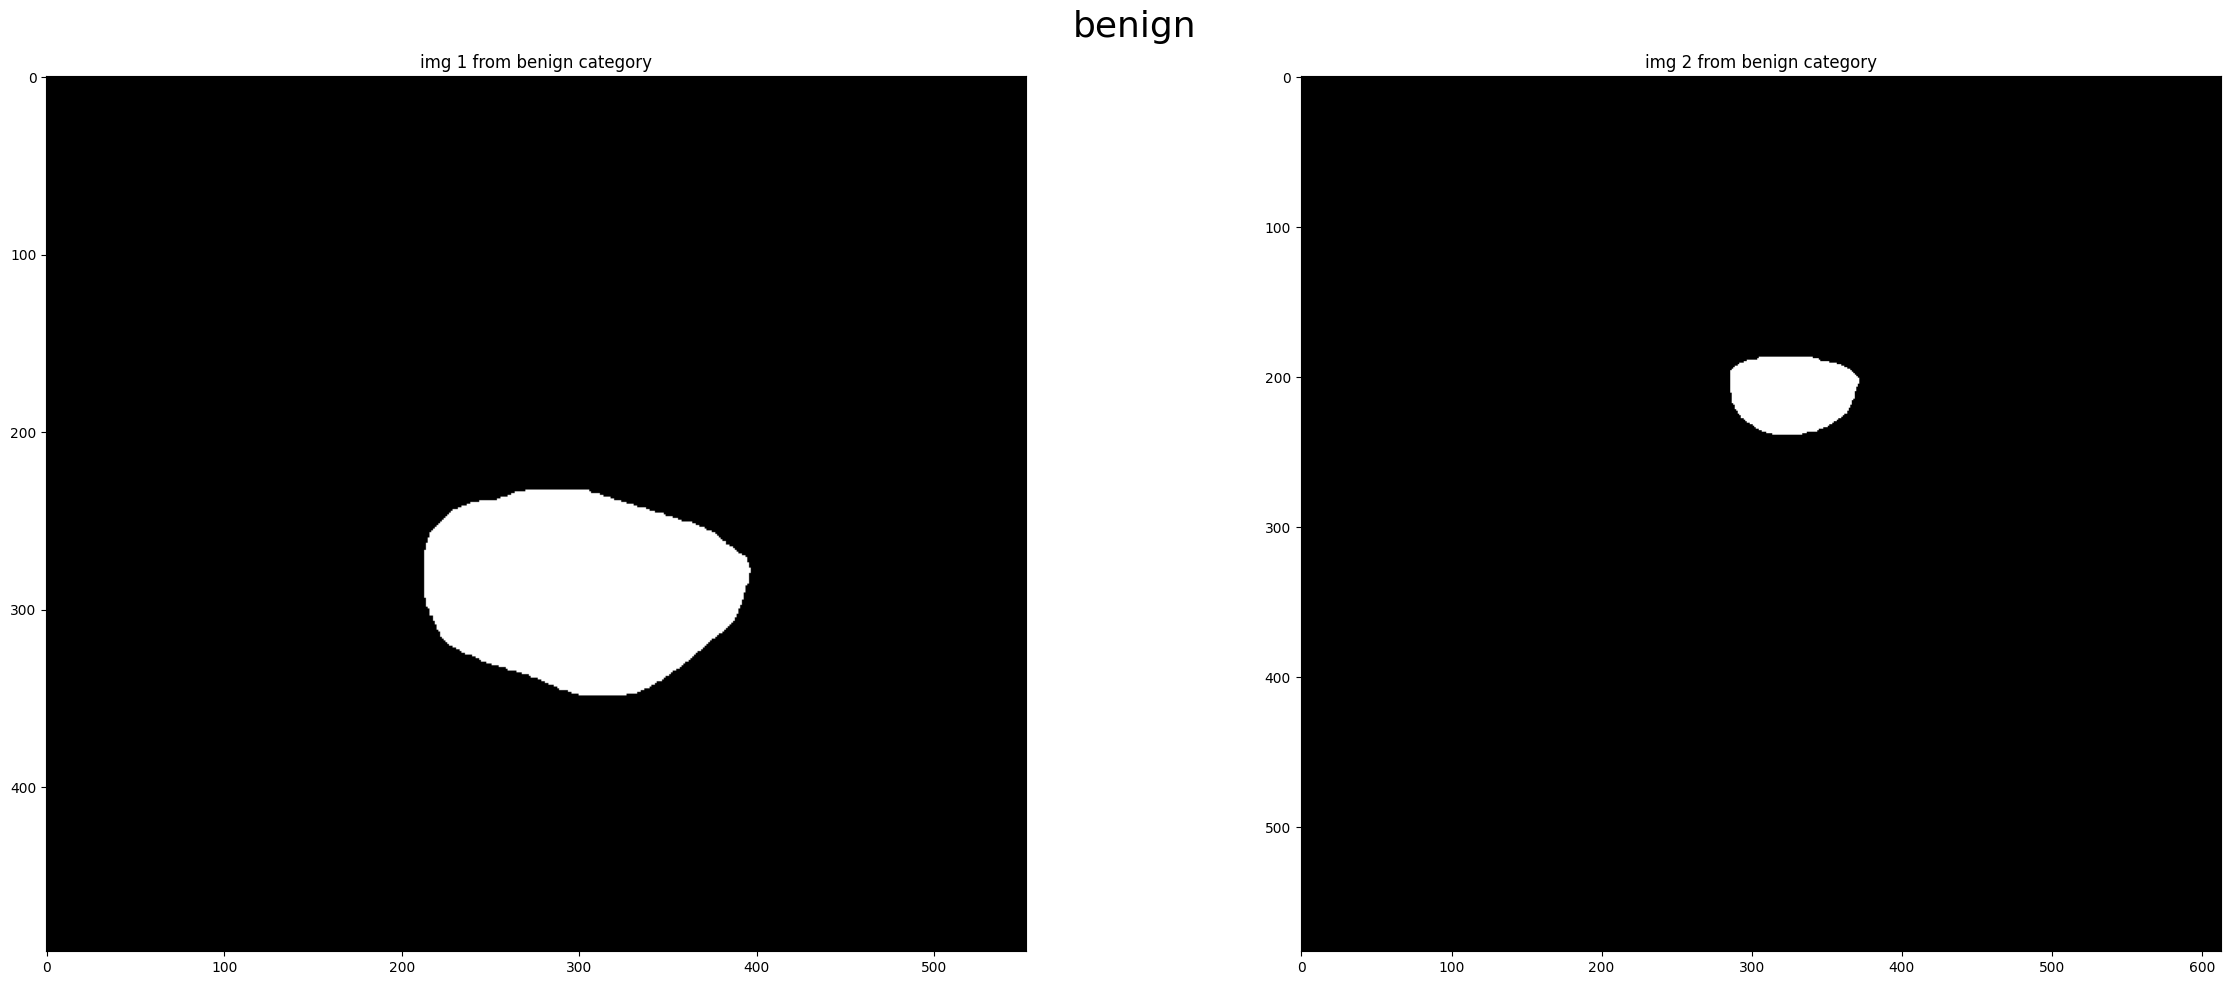

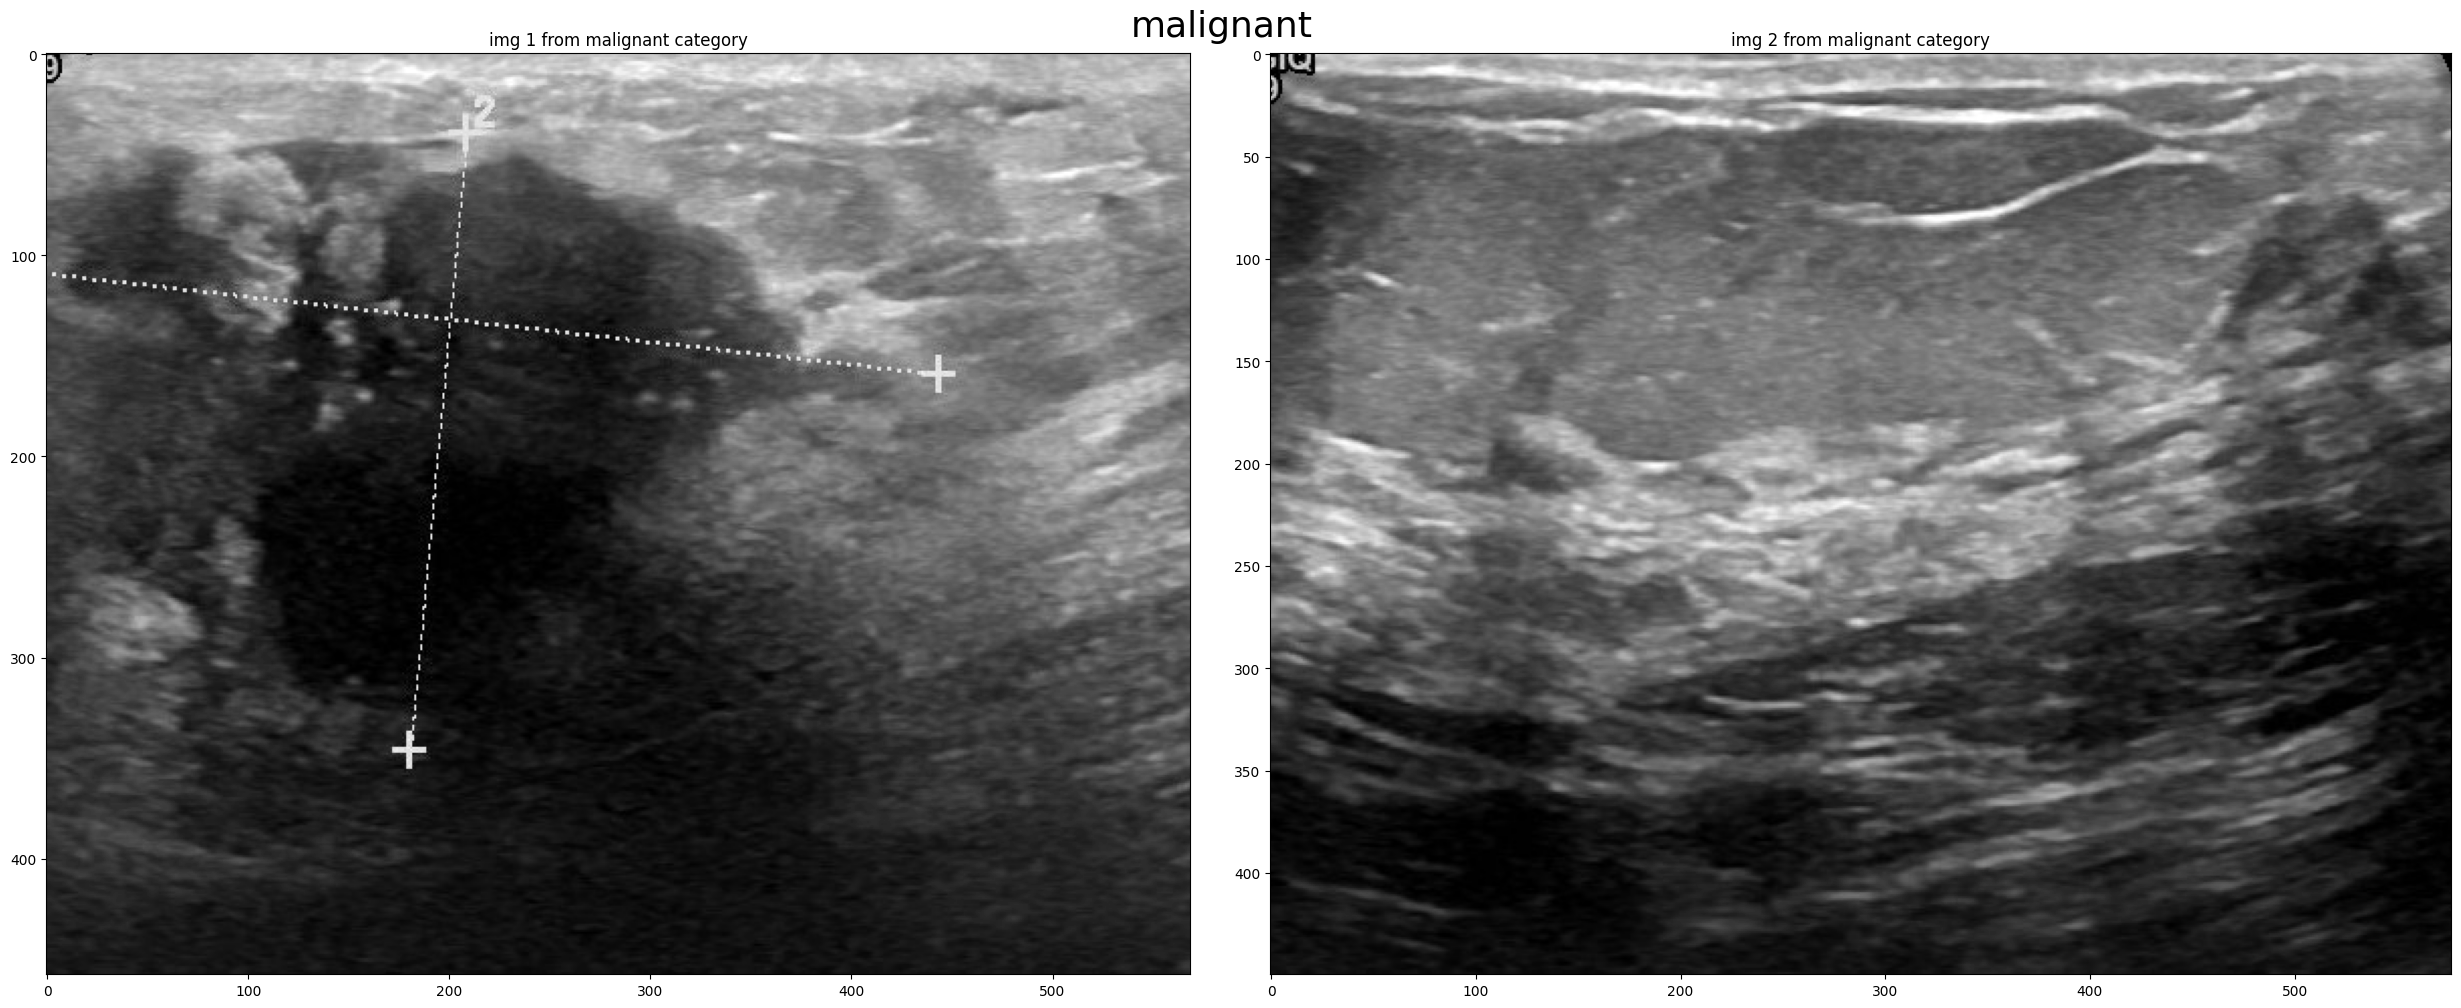

In [ ]:
# HER CLASS DAN 2 GÖRSEL ÇİZDİRME

folder_name = '/content/data/Dataset'
files_names = ['benign', 'malignant', 'normal']

for file in files_names:
    path = os.path.join(folder_name, file)
    x = 0
    fig, axes = plt.subplots(1,2, figsize=(25, 10))
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        axes[x].imshow(img_array, cmap='gray')
        axes[x].set_title(f"img {x+1} from {file} category")
        x += 1
        if x == 2:
            break

    plt.suptitle(file, fontsize=26)
    plt.tight_layout()
    plt.show()

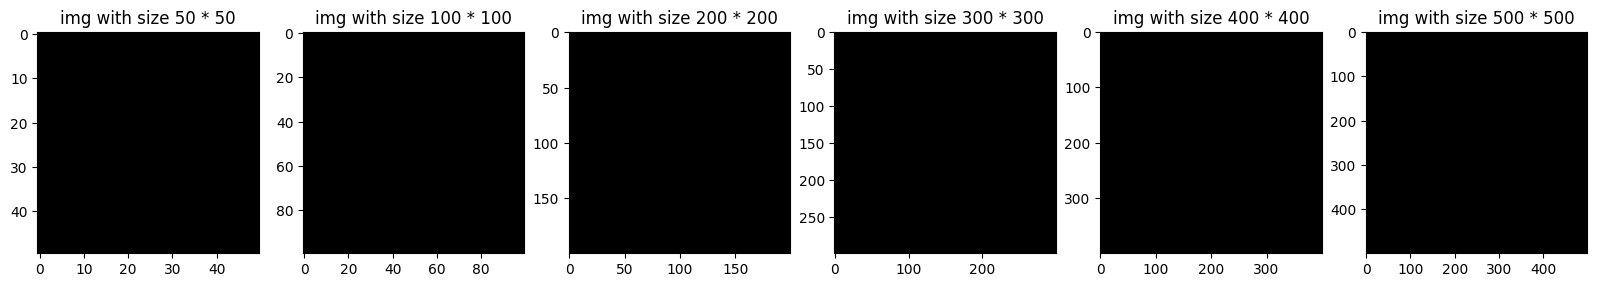

In [ ]:
img_sz = [50, 100, 200, 300, 400, 500]
plt.figure(figsize=(20, 5))

for i, sz in enumerate(img_sz):
    new_array = cv2.resize(img_array, (sz, sz))
    plt.subplot(1, len(img_sz), i+1)
    plt.imshow(new_array, cmap='gray')
    plt.title(f"img with size {sz} * {sz}")

plt.show()

In [ ]:
img_sz=300

In [ ]:
# DATAYI YÜKLEME

training_data = []

def create_training_data():
    for file in files_names:
        path = os.path.join(folder_name, file)
        class_num = files_names.index(file)
        print(file,class_num)

        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_sz, img_sz))  # Include resizing
            training_data.append([new_array, class_num])

create_training_data()

benign 0


100%|██████████| 891/891 [00:04<00:00, 222.63it/s]


malignant 1


100%|██████████| 421/421 [00:02<00:00, 188.92it/s]


normal 2


100%|██████████| 266/266 [00:02<00:00, 127.77it/s]


In [ ]:
# İLK 5 GÖRSELİN SINIFINI GÖRÜNTÜLEME

for i in range(5):
    print("Class number for image", i+1, ":", training_data[i][1])

Class number for image 1 : 0
Class number for image 2 : 0
Class number for image 3 : 0
Class number for image 4 : 0
Class number for image 5 : 0


In [ ]:
# SON 5 GÖRSELİN SINIFLARINI GÖRÜNTÜLEME

for i in range(-1, -6, -1):
    print("Class number for image", len(training_data) + i + 1, ":", training_data[i][1])

Class number for image 1578 : 2
Class number for image 1577 : 2
Class number for image 1576 : 2
Class number for image 1575 : 2
Class number for image 1574 : 2


In [ ]:
# ARTIK VERİLER SIRASIYLA ÖNCE İYİ HUYLU, SONRA KÖTÜ HUYLU VE ARDINDAN NORMAL GÖRÜNTÜLERE SAHİP . VERİLERİ KARIŞTIRALIM.
# KARIŞTIRMADAN SONRAKİ İLK 20 SINIFI GÖRÜNTÜLEME :

random.shuffle(training_data)

for i in range(30):
    print(f"Sample {i+1}:")
    print("Class number:", training_data[i][1],"\n")

Sample 1:
Class number: 0 

Sample 2:
Class number: 0 

Sample 3:
Class number: 1 

Sample 4:
Class number: 0 

Sample 5:
Class number: 1 

Sample 6:
Class number: 0 

Sample 7:
Class number: 2 

Sample 8:
Class number: 0 

Sample 9:
Class number: 1 

Sample 10:
Class number: 1 

Sample 11:
Class number: 1 

Sample 12:
Class number: 0 

Sample 13:
Class number: 0 

Sample 14:
Class number: 0 

Sample 15:
Class number: 0 

Sample 16:
Class number: 1 

Sample 17:
Class number: 1 

Sample 18:
Class number: 0 

Sample 19:
Class number: 1 

Sample 20:
Class number: 2 

Sample 21:
Class number: 2 

Sample 22:
Class number: 0 

Sample 23:
Class number: 0 

Sample 24:
Class number: 0 

Sample 25:
Class number: 0 

Sample 26:
Class number: 1 

Sample 27:
Class number: 2 

Sample 28:
Class number: 0 

Sample 29:
Class number: 0 

Sample 30:
Class number: 0 



In [ ]:
# FUTURE SELECTION (PARAMETRE SEÇİMİ)

X=[]
y=[]

for feature,label in training_data:
    X.append(feature)
    y.append(label)


X=np.array(X)
y=np.array(y)

In [ ]:
X=np.array(X)
y=np.array(y)
print(X.shape)
print(y.shape)

(1578, 300, 300)
(1578,)


In [ ]:
# VERİYİ BÖLME

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1262, 300, 300)
(1262,)
(316, 300, 300)
(316,)


In [ ]:
print(np.unique(y_train))

print(np.unique(y_test))

[0 1 2]
[0 1 2]


In [ ]:
# X İN GÖRÜNTÜLERİNİ ÖLÇEKLENDİRME

X_train = X_train/255
X_test = X_test/255

In [ ]:
# DEĞERLERİ [0,1] ARALIĞINDA ÖLÇEKLENDİRME VE GÖRÜNTÜLEME
print(X_train[0])

[[0.05490196 0.14117647 0.66666667 ... 0.78039216 0.81176471 0.80392157]
 [0.07058824 0.0627451  0.42745098 ... 0.82352941 0.85490196 0.86666667]
 [0.01568627 0.01960784 0.38823529 ... 0.8627451  0.89411765 0.91372549]
 ...
 [0.03921569 0.03137255 0.04705882 ... 0.0627451  0.07843137 0.0745098 ]
 [0.02352941 0.01176471 0.02352941 ... 0.0627451  0.07843137 0.08235294]
 [0.04313725 0.03921569 0.03921569 ... 0.0745098  0.09019608 0.08235294]]


In [ ]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.applications import ResNet50

# Veri yüklemesi ve işleme
folder_name = '/content/data/Dataset'
files_names = ['benign', 'malignant', 'normal']
img_sz = 224  # Görüntüleri DenseNet için 224x224 boyutuna yeniden boyutlandır

# Veriyi yükle ve işle
training_data = []

def create_training_data():
    for file in files_names:
        path = os.path.join(folder_name, file)
        class_num = files_names.index(file)

        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_sz, img_sz))
            rgb_array = cv2.cvtColor(new_array, cv2.COLOR_GRAY2RGB)  # Gri tonlamalı görüntüyü RGB'ye dönüştür
            training_data.append([rgb_array, class_num])

create_training_data()
random.shuffle(training_data)

X = []
y = []

for feature, label in training_data:
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Piksel değerlerini normalize et
X_train = X_train / 255.0
X_test = X_test / 255.0

# ResNet50 modelini oluştur
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_sz, img_sz, 3))
base_model.trainable = False  # Temel modelin eğitilebilirliğini kapat

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Modeli derle
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğit
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# Model performansını değerlendir
loss, test_accuracy = model.evaluate(X_test, y_test)
train_accuracy = max(history.history['accuracy'])
val_accuracy = max(history.history['val_accuracy'])

# Sonuçları ekrana yazdır
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")
print(f"Train Accuracy: {train_accuracy*100:.2f}%")

# Modeli kaydet
model.save('resnet_model.h5')

100%|██████████| 266/266 [00:01<00:00, 183.30it/s]


94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/30
40/40 [==============================] - 19s 244ms/step - loss: 1.3051 - accuracy: 0.4604 - val_loss: 1.0113 - val_accuracy: 0.5443
Epoch 2/30
40/40 [==============================] - 4s 113ms/step - loss: 1.1118 - accuracy: 0.4873 - val_loss: 0.9719 - val_accuracy: 0.5443
Epoch 3/30
40/40 [==============================] - 5s 116ms/step - loss: 1.0345 - accuracy: 0.5016 - val_loss: 0.9513 - val_accuracy: 0.5443
Epoch 4/30
40/40 [==============================] - 5s 123ms/step - loss: 0.9807 - accuracy: 0.5475 - val_loss: 0.9228 - val_accuracy: 0.5443
Epoch 5/30
40/40 [==============================] - 5s 113ms/step - loss: 0.9429 - accuracy: 0.5745 - val_loss: 0.9137 - val_accuracy: 0.5443
Epoch 6/30
40/40 [==============================] - 5s 126ms/step - loss: 0.9305 - accuracy: 0.5713 - val_loss: 0.8887 - val_accuracy: 0.5665
Epoch 7/30
40/40 [==============================] - 5s 114ms/step - loss: 0.9096 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
import os

# Kaydedilen modeli yükle
model_path = 'resnet_model.h5'
if os.path.exists(model_path):
    model = load_model(model_path)
    print("Kaydedilen model yüklendi.")
else:
    print("Kaydedilmiş bir model bulunamadı. Lütfen modeli eğitip kaydedin.")
    print()

# Confusion matrix ve classification report çizdirme
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.savefig("/content/Resnet-Confusion-Matris.png")
    plt.show()


def print_classification_report(y_true, y_pred, labels):
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=labels))

# Test verisi üzerinde tahmin yapma
y_pred_test = model.predict(X_test)
y_pred_test = np.argmax(y_pred_test, axis=1)

# Validation verisi üzerinde tahmin yapma
y_pred_val = model.predict(X_train)
y_pred_val = np.argmax(y_pred_val, axis=1)

# Confusion matrix ve classification report çizdirme
labels = ['Benign', 'Malignant', 'Normal']
plot_confusion_matrix(y_test, y_pred_test, labels)
print()
print_classification_report(y_test, y_pred_test, labels)
print()

# Eğitim ve doğrulama kaybı ile eğitim ve doğrulama doğruluğunu çizme
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("/content/Resnet-Model-Accuracy.png")
print()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("/content/Resnet-Model-Loss.png")
print()

plt.show()

Kaydedilmiş bir model bulunamadı. Lütfen modeli eğitip kaydedin.



NameError: name 'model' is not defined